# Tarea 3 - Aprendizaje Por Refuerzos

### Grupo 36:
     - N. Farías
     - J. M. Varela

## 1. Objetivo
El objetivo de esta tarea es construir un agente de aprendizaje por refuerzos utilizando el algoritmo de Q-Learning, que pueda resolver de manera eficiente el ambiente Taxi-v3 de la biblioteca Gymnasium. El agente debe ser capaz de aprender políticas óptimas que le permitan resolver el ambiente en el menor número de iteraciones posible, idealmente llegando al mínimo necesario.

El éxito del aprendizaje se mide a través del número promedio de iteraciones que el agente necesita para resolver el problema durante la fase de entrenamiento, que consiste en 1000 episodios. Además se evalua su capacidad para generalizar el aprendizaje a diferentes instancias del ambiente. También se evalúa la capacidad del agente para minimizar el número de iteraciones necesarias cuando se apaga la exploración, es decir, cuando el agente elige acciones únicamente en base a su conocimiento adquirido.

Importamos la biblioteca Gymnassium, que vamos a usar como framework de RL

In [1]:
!pip3 install cmake gymnasium scipy
import gymnasium as gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.3 MB/s eta 0:00:00


Creamos un ambiente y lo mostramos en pantalla. Para esto definimos una función para imprimir nuestro ambiente.

In [2]:
# La semilla usada para crear el ambiente
semilla = 1

entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)

# Una funcion de ayuda para imprimir el estado de nuestro mundo
def print_env(estado):
  env_str = estado.render()
  print(env_str)

print_env(entorno)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+





El rectángulo de color representa el taxi, amarillo cuando va sin pasajero y verde con pasajero.
'|' representa una pared que el taxi no puede cruzar, es decir.
R, G, Y, B son los puntos de interés, es decir, las posibles ubicaciones de recogida y destino. La letra azul representa la ubicación actual de recogida de pasajeros, y la letra púrpura es el destino actual.

Si cambiamos la semilla, cambia el estado del ambiente.

In [3]:
# Una semilla diferente
semilla = 2

entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)

print_env(entorno)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [4]:
# Una semilla diferente
semilla = 3

entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)

print_env(entorno)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




Exploremos el espacio de estados y de acciones:

In [5]:
print(f"Espacio de Acciones {entorno.action_space}")
print(f"Espacio de Estados {entorno.observation_space}")

Espacio de Acciones Discrete(6)
Espacio de Estados Discrete(500)


Hay 6 acciones, que corresponden a:
 * 0 = ir al Sur
 * 1 = ir al Norte
 * 2 = ir al Este
 * 3 = ir al Oeste
 * 4 = recoger pasajero
 * 5 = dejar pasajero

Los puntos cardinales siguen la convención Norte hacie arriba. Recoger/dejar al pasajero solo tienen efecto si el taxi está en la misma casilla que el pasajero, y en uno de los puntos de interés.

Nuestro agente deberá elegir la acción a tomar en cada paso. Gymnassium nos expone funciones para esto. Si queremos movernos al sur, por ejemplo:

In [6]:
semilla = 1
entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)
print_env(entorno)

accion = 0 # Sur
entorno.step(accion)

print_env(entorno)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)



Ahora estamos listos para programar un agente. Empezando por uno random. Se puede ejecutar el codigo abajo varias veces para ver como cambia en cada ejecución, debido a que la semilla_acciones es diferente.

In [7]:
import random

def episodio_random(semilla_ambiente = 1):
    entorno = gym.make("Taxi-v3", render_mode='ansi').env
    entorno.reset(seed = semilla_ambiente)

    iteraciones = 0
    penalizaciones, recompensa = 0, 0

    marcos = [] # para la animación

    termino = False
    truncado = False

    while not termino and not truncado:
        #  selecciona una acción aleatoria del conjunto de todas las posibles acciones
        accion = entorno.action_space.sample()
        estado, recompensa, termino, truncado, info = entorno.step(accion)

        # El agente trato de dejar/recoger al pasajero incorrectamente
        if recompensa == -10:
            penalizaciones += 1

        # Put each rendered frame into dict for animation
        marcos.append({
            'marco': entorno.render(),
            'estado': estado,
            'accion': accion,
            'recompensa': recompensa
            }
        )

        iteraciones += 1


    print(f"Iteraciones: {iteraciones}")
    print(f"Penalizaciones: {penalizaciones}")

    return marcos

marcos = episodio_random()

Iteraciones: 7925
Penalizaciones: 2586


Podemos ver el episodio completo abajo. Notar que seleccionamos la semillia de selector de acciones para que la corrida sea 'buena'.

In [ ]:
from IPython.display import clear_output
from time import sleep
import sys

def print_frames(marcos):
    for i, marco in enumerate(marcos):
        clear_output()
        print(marco['marco'])
        print(f"Iteracion: {i + 1}")
        print(f"Estado: {marco['estado']}")
        print(f"Accion: {marco['accion']}")
        print(f"Recompensa: {marco['recompensa']}")
        sys.stdout.flush()
        # Aumentar este tiempo para ver mejor la animación
        sleep(.01)

print_frames(marcos)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Iteracion: 1144
Estado: 0
Accion: 5
Recompensa: 20


Ahora queremos programar un agente inteligente, para eso nos vamos a atener a la siguiente interfaz.

In [8]:
class Agente:
    def elegir_accion(self, estado, max_accion) -> int:
        """Elegir la accion a tomar en el estado actual y el espacio de acciones"""
        pass

    def aprender(self, estado_anterior, estado_siguiente, accion, recompensa):
        """Aprender a partir de la tupla
            - estado_anterior: el estado desde que se empezó
            - estado_siguiente: el estado al que se llegó
            - accion: la acción que llevo al agente desde estado_anterior a estado_siguiente
            - recompensa: la recompensa recibida en la transicion
        """
        pass

Para nuestro agente aleatorio, esto sería:

In [9]:
import random

class AgenteAleatorio(Agente):
    def elegir_accion(self, estado, max_accion) -> int:
        # Elige una acción al azar
        return random.randrange(max_accion)

    def aprender(self, estado_anterior, estado_siguiente, accion, recompensa):
        # No aprende
        pass

Poniendolo a jugar:

In [10]:
semilla = 1
entorno = gym.make("Taxi-v3", render_mode='ansi').env

agente = AgenteAleatorio()

iteraciones = 0
penalizaciones, recompensa = 0, 0

marcos = [] # for animation

termino = False
truncado = False
estado_anterior, info = entorno.reset(seed = semilla)
while not termino and not truncado:
    # Le pedimos al agente que elija entre las posibles acciones (0..entorno.action_space.n)
    accion = agente.elegir_accion(estado_anterior, entorno.action_space.n)
    # Realizamos la accion
    estado_siguiente, recompensa, termino, truncado, info = entorno.step(accion)
    # Le informamos al agente para que aprenda
    agente.aprender(estado_anterior, estado_siguiente, accion, recompensa)

    # El agente trato de dejar/recoger al pasajero incorrectamente
    if recompensa == -10:
        penalizaciones += 1

    # Put each rendered frame into dict for animation
    marcos.append({
        'marco': entorno.render(),
        'estado': estado_siguiente,
        'accion': accion,
        'recompensa': recompensa
        }
    )

    estado_anterior = estado_siguiente
    iteraciones += 1


print(f"Iteraciones: {iteraciones}")
print(f"Penalizaciones: {penalizaciones}")

Iteraciones: 1111
Penalizaciones: 369


Podemos encapsular lo anterior en una función

In [11]:
def ejecutar_episodio(agente, semilla):
    entorno = gym.make("Taxi-v3", render_mode='ansi').env

    iteraciones = 0
    penalizaciones, recompensa = 0, 0

    marcos = [] # for animation

    termino = False
    truncado = False
    estado_anterior, info = entorno.reset(seed = semilla)
    while not termino and not truncado:
        # Le pedimos al agente que elija entre las posibles acciones (0..entorno.action_space.n)
        accion = agente.elegir_accion(estado_anterior, entorno.action_space.n)
        # Realizamos la accion
        estado_siguiente, recompensa, termino, truncado, info = entorno.step(accion)
        # Le informamos al agente para que aprenda
        agente.aprender(estado_anterior, estado_siguiente, accion, recompensa)

        # El agente trato de dejar/recoger al pasajero incorrectamente
        if recompensa == -10:
            penalizaciones += 1

        # Put each rendered frame into dict for animation
        marcos.append({
            'marco': entorno.render(),
            'estado': estado_siguiente,
            'accion': accion,
            'recompensa': recompensa
            }
        )

        estado_anterior = estado_siguiente
        iteraciones += 1
    return iteraciones


y correrlo varias veces para ver el rendimiento promedio

In [12]:
agente = AgenteAleatorio()
semilla = 1
num_iteraciones_episodios = []
for i in range(10):
    num_iteraciones = ejecutar_episodio(agente, semilla)
    num_iteraciones_episodios += [num_iteraciones]

Y obtener métricas al respecto

In [13]:
import numpy
print(f"Se realizaron {numpy.mean(num_iteraciones_episodios)}, iteraciones en promedio")

Se realizaron 2923.2, iteraciones en promedio


La tarea a realizar consiste en programar un agente de aprendizaje por refuerzos:

## 2. Diseño

En esta sección se detallan las decisiones tomadas para la implementación del agente de aprendizaje por refuerzos "AgenteRL".

## 2.1 Estructura del agente

La clase "AgenteRL" hereda de la clase "Agente", que funciona como interfaz. Aquí se agregan atributos y se crean los métodos para la implementación de Q-Learning. Se inicializa con una tabla Q de ceros, de dimensiones correspondientes al espacio de estados y de acciones del entorno.

## 2.2 Parámetros del modelo

Se utilizaron dos parámetros, gamma y epsilon, con valores de 0.9 y 0.2 respectivamente. Gamma actúa como el factor de descuento, el cual pondera la importancia de las recompensas inmediatas frente a las futuras, mientras que epsilon determina la probabilidad de explorar, es decir realizar acciones aleatorias durante el aprendizaje.  
La clase incluye métodos para activar y desactivar tanto el aprendizaje (apagar_aprendizaje, prender_aprendizaje) como la exploración (apagar_exploracion, prender_exploracion). Esto permite cierta flexibiliad a la hora de evaluar el rendimiento del agente con lo aprendido hasta el momento.

## 2.3 Selección de Acciones

El método elegir_accion se encarga de la selección de acciones. Aquí, si la exploración está activa y un número aleatorio es menor que epsilon, se elige una acción al azar. De lo contrario se selecciona la acción con el valor Q más alto para el estado actual.

## 2.4 Aprendizaje

El aprendizaje consiste en la actualización de la tabla Q, que se realiza a través del método aprender. Aquí, si el aprendizaje está activado, se ajustan el valor Q para el estado anterior y la acción realizada, basándose en la recompensa recibida y el máximo valor Q para el estado actual, ponderado por el factor de descuento gamma.

In [14]:
import numpy as np
import random

class AgenteRL(Agente):

    def __init__(self, entorno, entrenar=True, explorar=True) -> None:
        super().__init__()

        random.seed(1234)
        self.Q = np.zeros([entorno.observation_space.n, entorno.action_space.n])
        self.gamma = 0.9
        self.epsilon = 0.2
        self.entrenar = entrenar
        self.explorar = explorar

    def apagar_aprendizaje(self):
        self.entrenar = False

    def prender_aprendizaje(self):
        self.entrenar = True

    def apagar_exploracion(self):
        self.explorar = False

    def prender_exploracion(self):
        self.explorar = True

    def elegir_accion(self, estado, max_accion) -> int:
        if self.explorar and random.random() < self.epsilon:
          return random.randrange(max_accion)
        else:
          return np.argmax(self.Q[estado,:])

    def aprender(self, estado_anterior, estado_siguiente, accion, recompensa):
        if self.entrenar:
          self.Q[estado_anterior, accion] = recompensa + np.max(self.Q[estado_siguiente, :])  * self.gamma

Y ejecutar con el muchos episodios con la misma semilla:

In [15]:
# Advertencia: este bloque es un loop infinito si el agente se deja sin implementar

agente = AgenteRL(entorno)
semilla = 1
num_iteraciones_episodios = []
for i in range(1000):
    num_iteraciones = ejecutar_episodio(agente, semilla)
    num_iteraciones_episodios += [num_iteraciones]

## 2.5 Evaluación

Se calcula la cantidad de iteraciones promedio por episodio durante los 1000 episodios de entrenamiento con la semilla 1.  
Además se grafica la cantidad de iteraciones por episodio para ver qué tan rápido aprende el agente.  
Por último se evalua el rendimiento del agente explotando por completo el conocimiento adquirido.

In [16]:
# Analizar los resultados aqui
print(f"Se realizaron {np.mean(num_iteraciones_episodios)} iteraciones en promedio")

Se realizaron 18.855 iteraciones en promedio


Text(0, 0.5, 'Iteraciones')

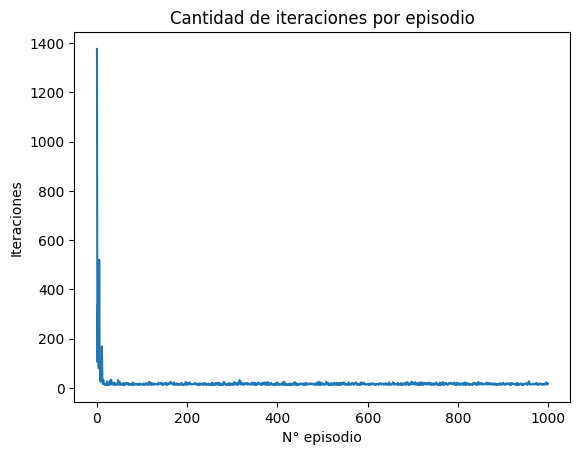

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1000), num_iteraciones_episodios)
plt.title("Cantidad de iteraciones por episodio")
plt.xlabel("N° episodio")
plt.ylabel("Iteraciones")

Se grafica ahora las primeras 100 iteraciones:

Text(0, 0.5, 'Iteraciones')

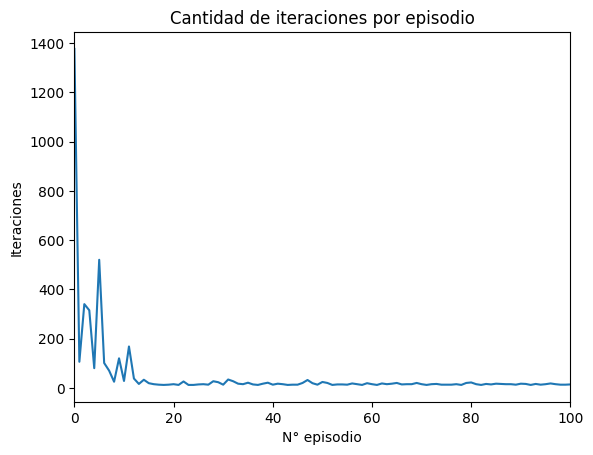

In [18]:
plt.plot(range(1000), num_iteraciones_episodios)
plt.xlim(0,100)
plt.title("Cantidad de iteraciones por episodio")
plt.xlabel("N° episodio")
plt.ylabel("Iteraciones")

In [19]:
agente.apagar_exploracion()
iter = ejecutar_episodio(agente, semilla)
agente.prender_exploracion()
print(f"Iteraciones para resolver el problema sin explorar:{iter}")

estados_con_valor = np.count_nonzero(agente.Q) / 6
print(f"Cantidad de estados con valor en la matriz Q:{estados_con_valor}")

Iteraciones para resolver el problema sin explorar:12
Cantidad de estados con valor en la matriz Q:100.0


Se puede ver que en general se obtiene un número de iteraciones promedio bajo, que probablemente no sea más cercano al mínimo debido al porcentaje de exploración.  
En la gráfica de iteraciones queda claro como aprende muy rápidamente, llegando al mínimo alrededor de la iteración 20 y manteniendose en ese nivel.  
Si se toma siempre la mejor acción (apagando la exploración), se resuelve el problema en 12 pasos, que son los mínimos necesarios para resolverlo. Por lo tanto se puede decir que el algoritmo aprendió correctamente a resolver el problema para el entorno inicializado con la semilla 1.  
Analizando más en detalle el aprendizaje, se sabe que el problema tiene 400 estados no finales para los cuales se puede aprender el valor de la función Q. Hay cuatro destinos posibles para el pasajero, por lo tanto son 100 estados para cada destino. Al contar la cantidad de valores no nulos de la matriz Q luego de las ejecuciones para el entorno con semilla = 1, se confirma que efectivamente se tiene información para 100 estados. Es decir, restan aún 300 estados (correspondientes a las tres opciones restantes de destino) por los que el agente no ha pasado, y por lo tanto no tiene información alguna.

## 3. Experimentación

Se procede a ejecutar 100 nuevos episodios con el agente entrenado anteriormente y el aprendizaje apagado, pero inicializando el entorno con una semilla diferente.  
En primera instacia se utiliza una semilla = 2, que genera un entorno en donde el destino es el mismo que para la semilla = 1. Es decir, el agente visitará estados para los cuales ya tiene algo de información en la matriz Q.


In [20]:
semilla = 2
agente.apagar_aprendizaje()
num_iteraciones_episodios_2 = []
for i in range(100):
    num_iteraciones = ejecutar_episodio(agente, semilla)
    num_iteraciones_episodios_2 += [num_iteraciones]

Se analizan los resultados obtenidos:

Se realizaron 41.16 iteraciones en promedio


Text(0, 0.5, 'Iteraciones')

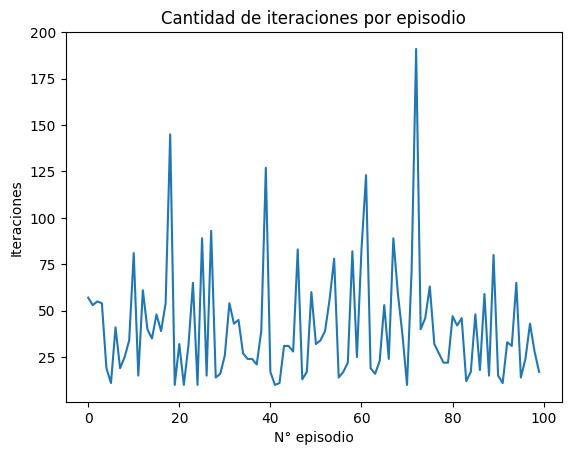

In [21]:
print(f"Se realizaron {np.mean(num_iteraciones_episodios_2)} iteraciones en promedio")
plt.plot(range(100), num_iteraciones_episodios_2)
plt.title("Cantidad de iteraciones por episodio")
plt.xlabel("N° episodio")
plt.ylabel("Iteraciones")

Se puede observar que al tener cierta información, el agente resuelve el ambiente en todos los episodios, sin embargo no lo hace de la forma más eficiente, esto se ve reflejado en el promedio de más de 40 iteraciones por episodio.  
Luego, se puede probar utilizar una semilla que genere una instancia del ambiente con otro destino, en este caso el agente no tiene ninguna información para resolverlo, por lo que la ejecución nunca terminaría (o tardaría mucho, ya que resolverlo en cada episodio depende enteramente del azar).

In [ ]:
#Esta celda nunca termina
#semilla = 3

#num_iteraciones_episodios_3 = []
#for i in range(100):
    #num_iteraciones = ejecutar_episodio(agente, semilla)
    #num_iteraciones_episodios_3 += [num_iteraciones]

**Podemos mejorar el agente para que se desempeñe bien usando cualquier semilla?**

Para lograr que el agente sea capaz de obtener un buen resultado en la primera ejecución para cualquier escenario, es necesario entrenarlo variando la semilla del entorno, en lugar de utilizar una semilla fija como se hizo inicialmente. Con eso se consigue un mejor aprendizaje de la función Q (visitando todos los estados), y por lo tanto el agente tendrá mejor información al momento de seleccionar la próxima acción.

In [22]:
agente = AgenteRL(entorno)

random.seed(123)
num_iteraciones_episodios_general = []
for i in range(1000):
    num_iteraciones_general = ejecutar_episodio(agente, random.randint(1,1000))
    num_iteraciones_episodios_general += [num_iteraciones_general]

In [23]:
print(f"Se realizaron {np.mean(num_iteraciones_episodios_general)}, iteraciones en promedio")

Se realizaron 34.918, iteraciones en promedio


(0.0, 400.0)

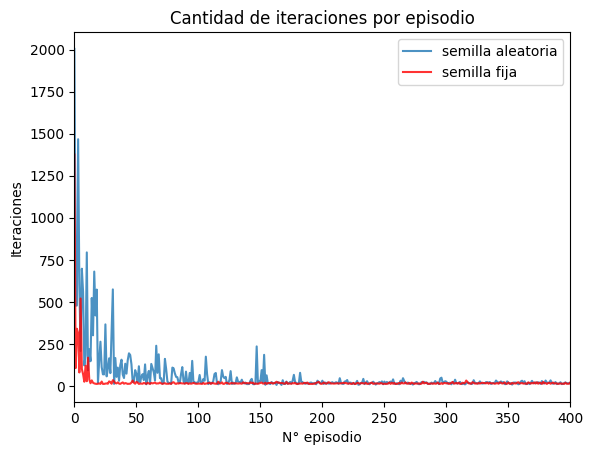

In [24]:
plt.figure()

plt.plot(range(1000), num_iteraciones_episodios_general, label='semilla aleatoria', alpha=0.8)
plt.plot(range(1000), num_iteraciones_episodios, color= 'r', label = 'semilla fija', alpha=0.8)
plt.legend()
plt.title("Cantidad de iteraciones por episodio")
plt.xlabel("N° episodio")
plt.ylabel("Iteraciones")
plt.xlim(0,400)

Comparando con lo que se obtenía al entrenar con una semilla fija, se puede ver que el agente demora más en acercarse a los valores mínimos de cantidad de iteraciones. Mientras que antes lo hacía alrededor del episodio 20, ahora lo hace luego del 150, lo cual determina que el promedio de iteraciones general es más alto. Esto es un comportamiento esperable, dado que el agente se está enfrentando a un escenario potencialmente distinto en cada episodio.

In [25]:
print(np.count_nonzero(agente.Q)/6)

400.0


A diferencia de lo que ocurría anteriormente, que se obtenía información únicamente para 100 estados, ahora se logra llenar las entradas de todos los estados de la matriz Q que no son finales.

Se procede a probar el agente con la exploración apagada, utilizando diferentes semillas, para ver qué tan bien resuelve el ambiente.

In [26]:
semilla = 123

entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)

print_env(entorno)

agente.apagar_exploracion()
iter = ejecutar_episodio(agente, semilla)
print(f"Iteraciones: {iter}")

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Iteraciones: 15


In [27]:
semilla = 456

entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)

print_env(entorno)

agente.apagar_exploracion()
iter = ejecutar_episodio(agente, semilla)
print(f"Iteraciones: {iter}")

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Iteraciones: 12


In [28]:
semilla = 789

entorno = gym.make("Taxi-v3", render_mode='ansi').env
entorno.reset(seed = semilla)

print_env(entorno)

agente.apagar_exploracion()
iter = ejecutar_episodio(agente, semilla)
print(f"Iteraciones: {iter}")

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Iteraciones: 12


En todos los casos resuelve el ambiente en la menor cantidad de iteraciones posible.

## 4. Conclusión

Se  logró construir un agente de aprendizaje por refuerzos que resuelva eficientemente el ambiente Taxi-v3 de la biblioteca Gymnasium para todas sus instancias.  
En una primera prueba, al ser entrenado únicamente en una instancia, el agente no se desempeñaba correctamente en el resto, en algunos casos sin ser capaz de siquiera resolver el ambiente.  
Luego, se entrenó el agente en instancias distintas en cada episodio. Ese cambio fue suficiente para que el agente aprenda lo necesario para resolver el ambiente en cualquiera de las instancias probadas.